## STEP 1: Data Preprocessing
- Data is cleaned and preprocesed to handle missing values.
- Categorical variables such as Traffic Status, Logistics_Delay_Reason, Assets_ID are converted into numeric values using one-hot encoding. 

## STEP 2: Exploratory Data Analysis (EDA)
- Traffic Condition Analysis: The distribution of shipments across different traffic statuses is examined.
- Waiting Time vs. Traffic: The relationship between waiting time and traffic congestion is visualized.
Correlation Analysis: A heatmap is generated to identify which features have the highest impact on logistics delays.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [71]:
df = pd.read_csv("smart_logistics_dataset.csv")
df.head(100)

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,NaN,60.1,285,1
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,NaN,99.2,260,0
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,NaN,71.6,270,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-09-27 18:08:16,Truck_4,-11.2424,-4.5638,203,Delivered,20.4,78.3,Detour,21,187,5,NaN,87.9,262,0
96,2024-11-17 08:35:02,Truck_6,62.6559,18.8474,297,Delayed,23.1,59.4,Detour,29,268,10,Traffic,71.2,151,1
97,2024-05-03 03:34:28,Truck_9,60.8032,-179.5906,238,In Transit,25.0,75.8,Heavy,26,330,9,Weather,99.2,165,1
98,2024-03-05 00:54:47,Truck_4,-10.0451,79.8956,126,Delivered,28.2,54.5,Detour,35,320,4,Mechanical Failure,93.7,136,0


 tiempo de entrega = waiting time.
 Costo de envio = User_Transaction_Amount    o    10%*(User_Transaction_Amount)   o  User_Transaction

In [ ]:
## df.info
data_info = pd.DataFrame({
    'Columna': df.columns,
    'Valores no Nulos': df.count(),
    'Tipo de Dato': df.dtypes
}).reset_index(drop=True)
data_info


,Columna,Valores no Nulos,Tipo de Dato
0,Timestamp,1000,object
1,Asset_ID,1000,object
2,Latitude,1000,float64
3,Longitude,1000,float64
4,Inventory_Level,1000,int64
5,Shipment_Status,1000,object
6,Temperature,1000,float64
7,Humidity,1000,float64
8,Traffic_Status,1000,object
9,Waiting_Time,1000,int64


Conteo categórico (Cuantos diferentes valores tenemos en una columna)

In [65]:
## Todos estuvieron
df.describe(include='all').T
df.isna().sum()


Timestamp                    0
Asset_ID                     0
Latitude                     0
Longitude                    0
Inventory_Level              0
Shipment_Status              0
Temperature                  0
Humidity                     0
Traffic_Status               0
Waiting_Time                 0
User_Transaction_Amount      0
User_Purchase_Frequency      0
Logistics_Delay_Reason     263
Asset_Utilization            0
Demand_Forecast              0
Logistics_Delay              0
dtype: int64

A partir de lo anterior, vemos que tenemos 263 NaN valores en solo "Asset_utilization"

In [ ]:
# Conteos categóricos
# Para ver cuantos valores diferentes tenemos en las columnas categoricas
conteos_categoricos = []
columnas = df.select_dtypes(include='object').columns.drop("Timestamp")

for col in columnas:
    conteos = df[col].value_counts()  # conteo de cada categoría
    conteos_categoricos.append({
        'Columna': col,
        'Valores diferentes': df[col].nunique(),
        'Conteos': conteos.to_dict()   # lo guardamos como diccionario
    })

conteos_categoricos = pd.DataFrame(conteos_categoricos)
print(conteos_categoricos)


                  Columna  Valores diferentes  \
0                Asset_ID                  10   
1         Shipment_Status                   3   
2          Traffic_Status                   3   
3  Logistics_Delay_Reason                   3   

                                             Conteos  
0  {'Truck_8': 109, 'Truck_4': 107, 'Truck_2': 10...  
1  {'Delayed': 350, 'Delivered': 338, 'In Transit...  
2        {'Detour': 345, 'Clear': 328, 'Heavy': 327}  
3  {'Weather': 267, 'Traffic': 236, 'Mechanical F...  


In [70]:
df["Traffic_Status"].value_counts() 
df["Logistics_Delay_Reason"].value_counts() 

Logistics_Delay_Reason
Weather               267
No Delay Reason       263
Traffic               236
Mechanical Failure    234
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlacion entre columnas')

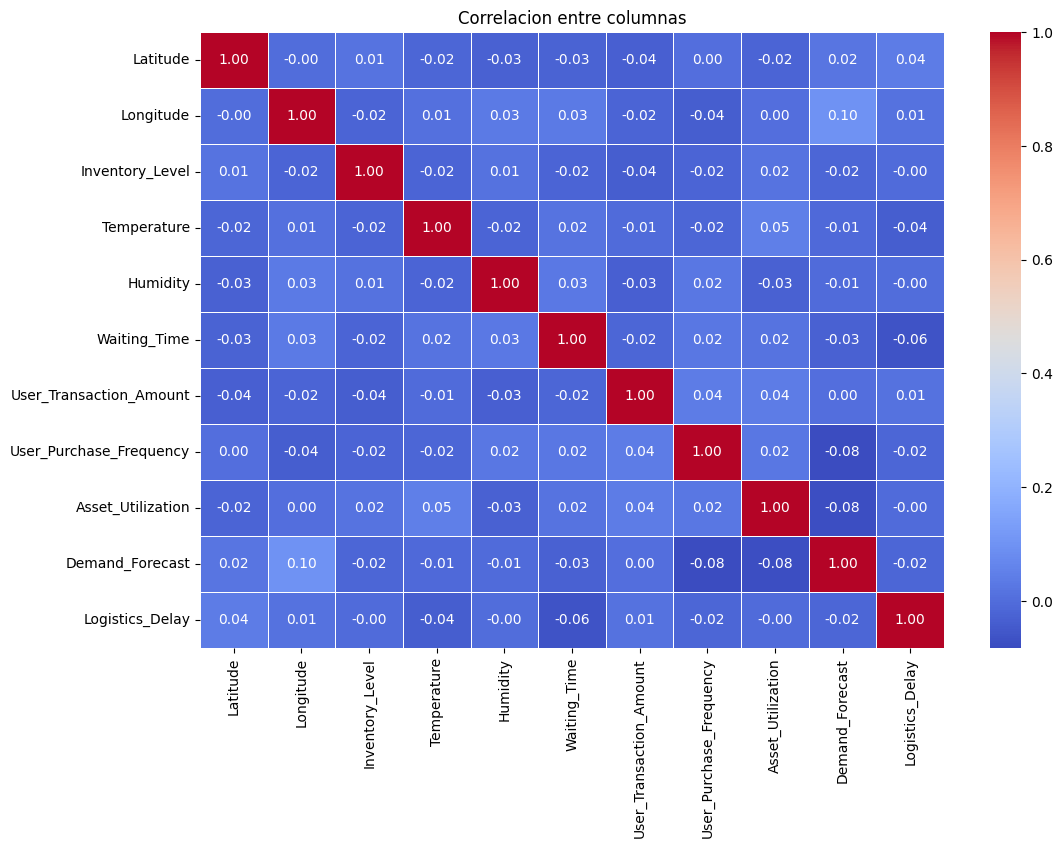

In [48]:
df_encoded= df.copy()
df_numeric= df.select_dtypes(include=['number'])

## Compute a correlation matrix
corr_matrix =df_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlacion entre columnas")

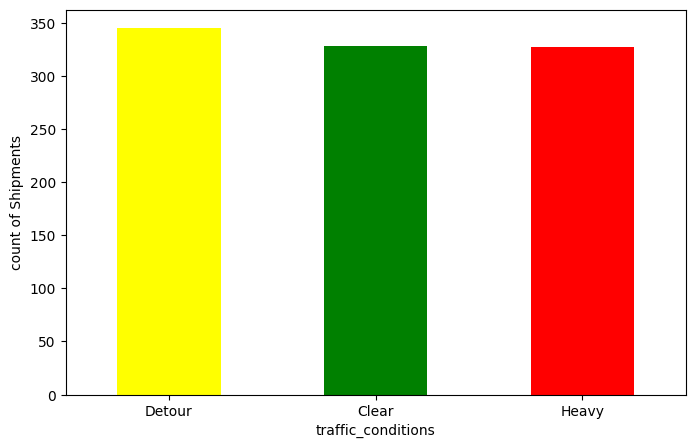

In [49]:
## shipments vs traffic distribution  analysis
traffic_distribution= df["Traffic_Status"].value_counts()

plt.figure(figsize=(8,5))
traffic_distribution.plot(kind="bar", color=["yellow", "green", "red"])
plt.xlabel("traffic_conditions")
plt.ylabel("count of Shipments")
plt.xticks(rotation=0)
plt.show()


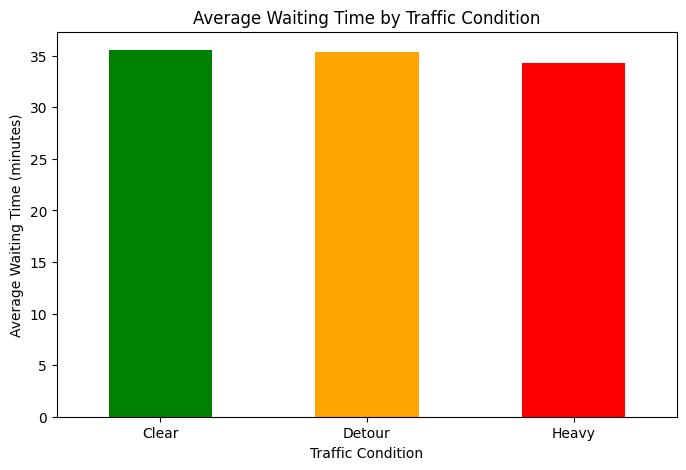

In [ ]:
# Analyze the average waiting time in different traffic conditions
traffic_waiting_time = df.groupby("Traffic_Status")["Waiting_Time"].mean()

# Visualize waiting time in different traffic conditions
plt.figure(figsize=(8, 5))
traffic_waiting_time.plot(kind="bar", color=["green", "orange", "red"])
plt.xlabel("Traffic Condition")
plt.ylabel("Average Waiting Time (minutes)")
plt.title("Average Waiting Time by Traffic Condition")
plt.xticks(rotation=0)
plt.show()


In [67]:
# Correlation between traffic status and logistics delay
df_encoded["Traffic_Status_Encoded"] = df["Traffic_Status"].map({"Clear": 0, "Detour": 1, "Heavy": 2})
traffic_delay_corr = df_encoded[["Traffic_Status_Encoded", "Logistics_Delay"]].corr().iloc[0, 1]

traffic_distribution, traffic_waiting_time, traffic_delay_corr

(Traffic_Status
 Detour    345
 Clear     328
 Heavy     327
 Name: count, dtype: int64,
 Traffic_Status
 Clear     35.542683
 Detour    35.307246
 Heavy     34.321101
 Name: Waiting_Time, dtype: float64,
 np.float64(0.52993231256055))

### Preparacion de la data
- Realizaremos conversion de tipos para algunas columnas que lo requieran
- Crearemos nuevas columnas de información clave.
- Considearemos que en la columna "Logistics_delay_reason" un valor faltante significa que no hubo alguna razón de demora "No Delay Reason". Este es un supuesto sobre el cual nos apoyaremos.

A continuacion, comenzaremos con procesar la columna "Timestamp" y convertirla en un horas "hour" y "day_of_week".


In [68]:
df['Logistics_Delay_Reason'] = df['Logistics_Delay_Reason'].fillna('No Delay Reason')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df.drop('Timestamp', axis=1, inplace=True) # Eliminar la columna original

In [ ]:
# 3. Aplicar One-Hot Encoding a las variables categóricas
categorical_features = ['Asset_ID', 'Shipment_Status', 'Traffic_Status', 'Logistics_Delay_Reason']

# Usa pd.get_dummies para realizar One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()


# El código de pd.get_dummies(df, ..., drop_first=True) maneja automáticamente la creación de estas nuevas columnas, eliminando la primera categoría de cada variable para evitar la multicolinealidad

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast,...,Asset_ID_Truck_7,Asset_ID_Truck_8,Asset_ID_Truck_9,Shipment_Status_Delivered,Shipment_Status_In Transit,Traffic_Status_Detour,Traffic_Status_Heavy,Logistics_Delay_Reason_No Delay Reason,Logistics_Delay_Reason_Traffic,Logistics_Delay_Reason_Weather
0,-65.7383,11.2497,390,27.0,67.8,38,320,4,60.1,285,...,True,False,False,False,False,True,False,True,False,False
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174,...,False,False,False,False,True,False,True,False,False,True
2,54.9232,79.5455,190,25.2,62.2,34,355,3,99.2,260,...,False,False,False,False,True,True,False,True,False,False
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160,...,False,False,True,True,False,False,True,False,True,False
4,-65.8477,47.9468,480,20.5,57.2,56,197,6,71.6,270,...,True,False,False,False,False,False,False,True,False,False


### Implementamos modelo sin normalizar variables
En este caso, el modelo buscará predecir si el envio sufrirá un delay o no. Este es un problema de clasficación (Supervised learning)


In [44]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


y=df["Logistics_Delay"]
x=df.drop("Logistics_Delay",axis=1)

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

print("Test Size", x_test.shape, y_test.shape)
print("Train Size", x_train.shape,y_train.shape)

# Modelo 1: Regresión Logística
print("--- Modelo de Regresión Logística (Sin Normalización) ---")
log_reg = LogisticRegression(random_state=42, solver='liblinear') 
# Se usa 'liblinear' porque es un buen optimizador para conjuntos de datos pequeños
# y es robusto ante datos no escalados.
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)
print(classification_report(y_test, y_pred_log_reg))



Test Size (200, 28) (200,)
Train Size (800, 28) (800,)
--- Modelo de Regresión Logística (Sin Normalización) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [40]:
df["Logistics_Delay"].head()

0    1
1    1
2    0
3    1
4    1
Name: Logistics_Delay, dtype: int64

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

### Implementamos modelo normalizando variables


In [ ]:
from sklearn.preprocessing import StandardScaler

# Columnas a normalizar
features_to_scale = ['Temperature', 'Humidity', 'Asset_Utilization', 'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency', 'Demand_Forecast']

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
x_train[features_to_scale] = scaler.fit_transform(x_train[features_to_scale])

# Transformar los datos de prueba usando el mismo scaler
x_test[features_to_scale] = scaler.transform(x_test[features_to_scale])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Latitude                                1000 non-null   float64
 1   Longitude                               1000 non-null   float64
 2   Inventory_Level                         1000 non-null   int64  
 3   Temperature                             1000 non-null   float64
 4   Humidity                                1000 non-null   float64
 5   Waiting_Time                            1000 non-null   int64  
 6   User_Transaction_Amount                 1000 non-null   int64  
 7   User_Purchase_Frequency                 1000 non-null   int64  
 8   Asset_Utilization                       1000 non-null   float64
 9   Demand_Forecast                         1000 non-null   int64  
 10  Logistics_Delay                         1000 non-null   int64

In [ ]:
y = df['Concretecompressivestrength']
x = df.drop('Concretecompressivestrength', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Train size :", x_train.shape, y_train.shape)
print("Test size  :", x_test.shape, y_test.shape)

Analizaremos los valores de columnas claves para observar si los podemos comvertir a números, los cuales son más facilmente procesables.

Asset_ID
Truck_8     109
Truck_4     107
Truck_2     105
Truck_10    105
Truck_6     103
Truck_7     102
Truck_9      94
Truck_5      93
Truck_3      93
Truck_1      89
Name: count, dtype: int64